In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
print(x_train[:1])

x_train = x_train/255
print(x_train[:1])

x_test = x_test/255

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   0   0   0   0   0  18 219 253 253 2

In [5]:
print(y_train[:5])

y_train = keras.utils.to_categorical(y_train, num_classes=10)
print(y_train[:5])


[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
from keras.models import Model
from keras import Sequential
from keras.layers import Conv1D, BatchNormalization, Dense, Flatten, Dropout
from keras import Input

In [7]:
i_layer = Input(shape=(28,28))

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(i_layer)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Conv1D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(x)
x = BatchNormalization(momentum=0.9)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.2)(x)

o_layer = Dense(units=10, activation='softmax')(x)

model = Model(i_layer, o_layer)

In [8]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 28, 32)         │         2,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,418 (489.91 KB)

 Trainable params: 125,226 (489.16 KB)

 Non-trainable params: 192 (768.00 B)

In [9]:
model.fit(x_train, y_train, batch_size=1000, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
48/48 - 18s - 368ms/step - accuracy: 0.7044 - loss: 0.9262 - val_accuracy: 0.9242 - val_loss: 0.2514
Epoch 2/10
48/48 - 8s - 157ms/step - accuracy: 0.9081 - loss: 0.2973 - val_accuracy: 0.9540 - val_loss: 0.1460
Epoch 3/10
48/48 - 10s - 206ms/step - accuracy: 0.9364 - loss: 0.2046 - val_accuracy: 0.9656 - val_loss: 0.1117
Epoch 4/10
48/48 - 9s - 186ms/step - accuracy: 0.9510 - loss: 0.1617 - val_accuracy: 0.9715 - val_loss: 0.0923
Epoch 5/10
48/48 - 7s - 155ms/step - accuracy: 0.9576 - loss: 0.1359 - val_accuracy: 0.9749 - val_loss: 0.0827
Epoch 6/10
48/48 - 10s - 207ms/step - accuracy: 0.9618 - loss: 0.1203 - val_accuracy: 0.9778 - val_loss: 0.0738
Epoch 7/10
48/48 - 6s - 123ms/step - accuracy: 0.9670 - loss: 0.1067 - val_accuracy: 0.9796 - val_loss: 0.0678
Epoch 8/10
48/48 - 7s - 154ms/step - accuracy: 0.9705 - loss: 0.0935 - val_accuracy: 0.9807 - val_loss: 0.0633
Epoch 9/10
48/48 - 9s - 182ms/step - accuracy: 0.9728 - loss: 0.0869 - val_accuracy: 0.9820 - val_loss: 0.058

In [10]:
prediction = model.predict(x_test)
print(prediction[:5])

prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])
print(y_test[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[1.6631845e-10 2.6825187e-09 4.2775912e-07 1.5751207e-06 7.1582588e-12
  6.2602573e-10 3.0100499e-12 9.9999589e-01 2.0592933e-10 1.9677782e-06]
 [8.9214204e-08 1.4966344e-04 9.9984527e-01 4.7606368e-06 1.6818621e-10
  5.0139118e-08 7.7225536e-08 2.1367303e-08 3.0751785e-08 1.9934695e-11]
 [1.6032531e-06 9.9980783e-01 1.3832741e-05 8.2147159e-07 6.4537235e-05
  5.6138841e-08 1.5123455e-05 9.0933318e-05 4.1831795e-06 1.0080482e-06]
 [9.9988300e-01 5.7435550e-08 1.7876617e-05 1.3058883e-07 2.1116366e-06
  1.7447647e-06 2.9470242e-05 3.6797894e-06 1.3788097e-06 6.0520357e-05]
 [6.2762018e-09 1.1700780e-08 2.2672833e-09 1.2645258e-09 9.9996048e-01
  3.0267627e-10 2.4486589e-08 9.0761074e-07 4.6507370e-08 3.8445723e-05]]
[7 2 1 0 4]
[7 2 1 0 4]


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [12]:
ac_score = accuracy_score(y_test, prediction)
print(ac_score)

conf_matrix = confusion_matrix(y_test, prediction)
print(conf_matrix)

0.9804
[[ 971    0    0    0    1    0    3    1    4    0]
 [   0 1125    2    1    0    1    3    1    2    0]
 [   3    1 1008    2    1    0    3    6    7    1]
 [   0    0    3  989    0    7    0    5    3    3]
 [   2    0    0    0  964    0    3    2    2    9]
 [   3    0    0    7    2  869    6    2    0    3]
 [   4    3    0    0    3    1  945    0    2    0]
 [   2    5    7    0    1    0    0 1005    1    7]
 [   3    1    3    0    1    0    1    4  957    4]
 [   4    3    1    2   14    2    0    9    3  971]]


In [13]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'actual')

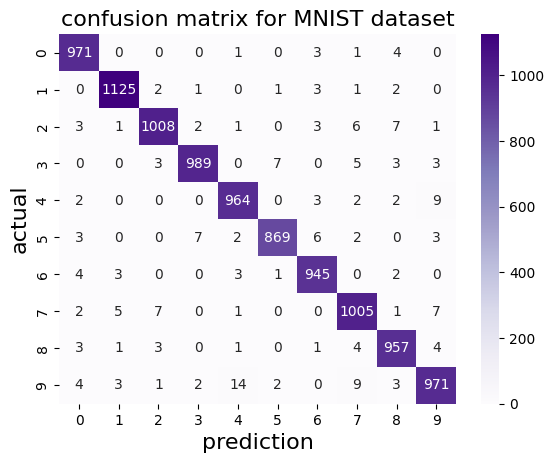

In [14]:
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
ax.set_title('confusion matrix for MNIST dataset', fontsize=16)
ax.set_xlabel('prediction', fontsize=16)
ax.set_ylabel('actual', fontsize=16)